# Competition dataset

## Phase 0: Imports and data read

In [60]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Used in Data Processing
from sklearn import preprocessing

# Definir o número máximo de colunas do pandas para 40
pd.set_option('display.max_columns', 40)

The following configuration was implemented to avoid pandas from considering that the 'None' value in the column 'Injeçao na rede (kWh)' as NaN.

In [61]:
allowed_nans = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN',
                '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA',
                'NULL', 'NaN', 'n/a', 'nan', 'null']

treino = pd.read_csv('datasets/treino.csv', na_values=allowed_nans, keep_default_na=False)
teste = pd.read_csv('datasets/teste.csv', na_values=allowed_nans, keep_default_na=False)

## Phase 1: Shallow data exploration

In [62]:
treino.shape

(11016, 35)

In [63]:
treino.columns

Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description', 'Data',
       'Hora', 'Normal (kWh)', 'Horario Economico (kWh)', 'Autoconsumo (kWh)',
       'Injeçao na rede (kWh)', 'snowfall (cm)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'terrestrial_radiation (W/m²)', 'shortwave_radiation_instant (W/m²)',
       'direct_radiation_instant (W/m²)', 'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)'],
      dtype='object')

In [64]:
treino.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),snowfall (cm),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,1632873600,2021-09-29 00:00:00+00:00,local,13.97,13.54,11.45,14.04,1027,1027.9,1004.4,81,1.96,NaN,87,overcast clouds,2021-09-29,0,0.0,0.0,0.0,None,0.0,14.4,14.3,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1632877200,2021-09-29 01:00:00+00:00,local,13.48,13.02,13.43,13.90,1028,1027.9,1004.4,82,1.83,NaN,91,overcast clouds,2021-09-29,1,0.0,0.0,0.0,None,0.0,18.0,13.9,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1632880800,2021-09-29 02:00:00+00:00,local,12.93,12.47,12.72,13.43,1027,1027.8,1004.3,84,1.96,NaN,93,overcast clouds,2021-09-29,2,0.0,0.0,0.0,None,0.0,14.4,13.7,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1632884400,2021-09-29 03:00:00+00:00,local,12.61,12.15,10.34,12.93,1027,1027.6,1004.1,85,1.85,NaN,95,overcast clouds,2021-09-29,3,0.0,0.0,0.0,None,0.0,14.8,13.4,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1632888000,2021-09-29 04:00:00+00:00,local,12.61,12.17,9.79,12.93,1027,1027.8,1004.3,86,1.83,NaN,93,overcast clouds,2021-09-29,4,0.0,0.0,0.0,None,0.0,14.8,13.2,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
treino.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),snowfall (cm),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
count,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,2284.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.0,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,1018.590151,995.558696,76.570715,2.672039,0.896642,54.000908,11.500000,0.202278,0.159714,0.117314,0.0,21.274156,15.205084,0.301811,162.275236,112.823439,49.451797,207.177151,298.552106,161.161583,111.948475,49.213099,204.480973,297.553704
std,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,6.199122,5.931816,16.268260,1.476158,1.079381,40.553002,6.922501,0.349478,0.271792,0.176762,0.0,11.537205,6.358176,0.104578,246.470533,198.963939,70.758598,304.039409,386.106608,247.028959,199.224159,71.259017,305.032450,388.397917
min,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,994.500000,971.700000,19.000000,0.060000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.200000,1.700000,0.094000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,1014.900000,992.100000,66.000000,1.620000,0.210000,7.000000,5.750000,0.000000,0.000000,0.000000,0.0,12.200000,10.600000,0.238000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,1018.400000,995.500000,81.000000,2.400000,0.460000,60.000000,11.500000,0.000000,0.000000,0.000000,0.0,18.700000,14.200000,0.324000,2.000000,0.000000,2.000000,0.000000,21.750000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,1022.700000,999.500000,91.000000,3.420000,1.092500,98.000000,17.250000,0.314000,0.288000,0.227000,0.0,28.100000,19.000000,0.393000,273.000000,149.000000,87.000000,405.850000,586.950000,267.400000,142.925000,87.700000,409.550000,593.200000
max,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,1033.900000,1010.200000,100.000000,11.100000,7.450000,100.000000,23.000000,3.251000,6.978000,1.192000,0.0,76.000000,37.800000,0.435000,975.000000,867.000000,407.000000,962.000000,1256.100000,973.800000,866.600000,407.800000,962.000000,1253.400000


In [66]:
treino.duplicated().any()

False

In [67]:
treino.isna().any()

dt                                         False
dt_iso                                     False
city_name                                  False
temp                                       False
feels_like                                 False
temp_min                                   False
temp_max                                   False
pressure                                   False
sea_level                                  False
grnd_level                                 False
humidity                                   False
wind_speed                                 False
rain_1h                                     True
clouds_all                                 False
weather_description                        False
Data                                       False
Hora                                       False
Normal (kWh)                               False
Horario Economico (kWh)                    False
Autoconsumo (kWh)                          False
Injeçao na rede (kWh

Only the feature 'rain_1h' has missing values.

In [68]:
treino.dtypes

dt                                           int64
dt_iso                                      object
city_name                                   object
temp                                       float64
feels_like                                 float64
temp_min                                   float64
temp_max                                   float64
pressure                                     int64
sea_level                                  float64
grnd_level                                 float64
humidity                                     int64
wind_speed                                 float64
rain_1h                                    float64
clouds_all                                   int64
weather_description                         object
Data                                        object
Hora                                         int64
Normal (kWh)                               float64
Horario Economico (kWh)                    float64
Autoconsumo (kWh)              

In [69]:
treino['Normal (kWh)'].value_counts()

Normal (kWh)
0.000    6018
0.001      23
0.008      19
0.252      17
0.016      17
         ... 
1.479       1
1.024       1
0.839       1
0.832       1
1.327       1
Name: count, Length: 1282, dtype: int64

In [70]:
treino['Autoconsumo (kWh)'].value_counts()

Autoconsumo (kWh)
0.000    5657
0.001      67
0.002      57
0.004      48
0.003      38
         ... 
0.901       1
0.808       1
0.624       1
0.771       1
0.848       1
Name: count, Length: 752, dtype: int64

In [71]:
treino['Horario Economico (kWh)'].value_counts()

Horario Economico (kWh)
0.000    6813
0.263      34
0.256      31
0.321      29
0.260      27
         ... 
1.811       1
1.571       1
1.440       1
1.675       1
0.702       1
Name: count, Length: 851, dtype: int64

In [72]:
treino['Injeçao na rede (kWh)'].value_counts()

Injeçao na rede (kWh)
None         7777
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64

In [73]:
treino['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [74]:
treino['rain_1h'].isna().sum()

8732

In [75]:
treino[treino['rain_1h'].isnull()]['weather_description'].value_counts()

weather_description
sky is clear        3010
overcast clouds     2430
broken clouds       1413
scattered clouds    1148
few clouds           731
Name: count, dtype: int64

In [76]:
treino[treino['rain_1h'].notnull()]['weather_description'].value_counts()

weather_description
light rain              1662
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

When the feature "rain_1h" is a missing value, the values of the feature "weather_description" are one of the above, none of the values have the word "rain" present, so we can conclude that when the "rain_1h" is null it represents the value 0.

In [77]:
treino['city_name'].nunique()

1

'city_name' is a useless column because it only has 1 value. 

### Outlier detection

In [78]:
columns = ['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h']

# Function to detect outliers using IQR (Inter Quartile Range) 
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers in each column of the DataFrame
outliers = treino[columns].apply(detect_outliers_iqr)
rows_with_outliers = outliers.any(axis=1)
indexes_with_outliers = treino.index[rows_with_outliers].tolist()
len(indexes_with_outliers)

1203

There are 2377 rows containing outliers in the entire "treino" dataset.

### Missing value detection

In [79]:
treino.isna().sum()

dt                                            0
dt_iso                                        0
city_name                                     0
temp                                          0
feels_like                                    0
temp_min                                      0
temp_max                                      0
pressure                                      0
sea_level                                     0
grnd_level                                    0
humidity                                      0
wind_speed                                    0
rain_1h                                    8732
clouds_all                                    0
weather_description                           0
Data                                          0
Hora                                          0
Normal (kWh)                                  0
Horario Economico (kWh)                       0
Autoconsumo (kWh)                             0
Injeçao na rede (kWh)                   

In [80]:
teste.isna().sum()

dt                                          504
dt_iso                                        0
city_name                                   504
temp                                          0
feels_like                                    0
temp_min                                      0
temp_max                                      0
pressure                                    504
sea_level                                     0
grnd_level                                    0
humidity                                      0
wind_speed                                    0
rain_1h                                    2050
clouds_all                                    0
weather_description                         504
Data                                          0
Hora                                          0
Normal (kWh)                                  0
Horario Economico (kWh)                       0
Autoconsumo (kWh)                             0
snowfall (cm)                           

## Phase 2: Data treatment

The column 'city_name' only has 1 possible value so it is useless and must the removed from the dataset. 

In [81]:
treino.drop('city_name', inplace=True, axis=1)
teste.drop('city_name', inplace=True, axis=1)

The "dt" column is a timestamp (an id for the time), and so it is useless and must be removed. The column 'dt_iso' is going to be replaced by the features 'Data' e 'Hora'

In [82]:
treino.drop(['dt', 'dt_iso'], inplace=True, axis=1)
teste.drop(['dt', 'dt_iso'], inplace=True, axis=1)

### Feature engineering

2 columns that we can create are the column 'Month', representing the current month of the instance, and the column 'Season', representing the current season of the instance.

In [83]:
# Convert Data features to the type datetime
treino['Data'] = pd.to_datetime(treino['Data'], format="%Y-%m-%d")
teste['Data'] = pd.to_datetime(teste['Data'], format="%Y-%m-%d")

def seasons(e):
    m = e.month
    x = m % 12 // 3 + 1
    map = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Autumn"}
    return map[x]

def months(e):
    return e.month

treino['Season'] = treino['Data'].apply(seasons)
teste['Season'] = teste['Data'].apply(seasons)

treino['Month'] = treino['Data'].apply(months)
teste['Month'] = teste['Data'].apply(months)
treino

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),snowfall (cm),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),Season,Month
0,13.97,13.54,11.45,14.04,1027,1027.9,1004.4,81,1.96,NaN,87,overcast clouds,2021-09-29,0,0.000,0.000,0.0,None,0.0,14.4,14.3,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
1,13.48,13.02,13.43,13.90,1028,1027.9,1004.4,82,1.83,NaN,91,overcast clouds,2021-09-29,1,0.000,0.000,0.0,None,0.0,18.0,13.9,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
2,12.93,12.47,12.72,13.43,1027,1027.8,1004.3,84,1.96,NaN,93,overcast clouds,2021-09-29,2,0.000,0.000,0.0,None,0.0,14.4,13.7,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
3,12.61,12.15,10.34,12.93,1027,1027.6,1004.1,85,1.85,NaN,95,overcast clouds,2021-09-29,3,0.000,0.000,0.0,None,0.0,14.8,13.4,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
4,12.61,12.17,9.79,12.93,1027,1027.8,1004.3,86,1.83,NaN,93,overcast clouds,2021-09-29,4,0.000,0.000,0.0,None,0.0,14.8,13.2,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,15.70,15.57,15.57,15.72,1018,1018.4,995.3,86,5.56,3.58,100,moderate rain,2022-12-31,19,1.693,0.000,0.0,None,0.0,52.2,12.7,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,12
11012,15.55,15.43,12.72,15.70,1018,1018.8,995.7,87,4.47,4.20,100,heavy intensity rain,2022-12-31,20,1.327,0.000,0.0,None,0.0,47.5,12.8,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,12
11013,13.45,13.28,12.23,13.99,1019,1019.0,995.9,93,3.29,4.23,100,heavy intensity rain,2022-12-31,21,0.757,0.000,0.0,None,0.0,46.4,12.8,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,12
11014,12.93,12.73,12.23,13.43,1019,1019.0,995.9,94,1.49,3.90,100,moderate rain,2022-12-31,22,0.000,0.675,0.0,None,0.0,40.0,12.8,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,12


In [84]:
# Remoção das linhas com outliers (?)
# treino.drop(indexes_with_outliers, inplace=True)
# treino.shape

Filling the "rain_1h" missing values with the value 0.

In [85]:
treino['rain_1h'] = treino['rain_1h'].fillna(0)
teste['rain_1h'] = teste['rain_1h'].fillna(0)

The feature "weather_description" in the "teste" dataset has 504 entries with missing values. We developed a Decision tree classifier model to predict this values.

In [86]:
# teste['weather_description'].fillna(teste['weather_description'].mode()[0], inplace=True)
from sklearn.tree import DecisionTreeClassifier

label_encoder_wd = preprocessing.LabelEncoder() 

teste_wd = teste.copy()

teste_wd['Data'] = label_encoder_wd.fit_transform(teste_wd['Data'])
teste_wd['Season'] = label_encoder_wd.fit_transform(teste_wd['Season'])
teste_wd['Month'] = label_encoder_wd.fit_transform(teste_wd['Month'])

treino_wd = teste_wd.dropna()
teste_wd = teste_wd[teste_wd['weather_description'].isnull()]

X_treino_wd = treino_wd.drop('weather_description', axis=1)
y_treino_wd = treino_wd['weather_description']

X_teste_wd = teste_wd.drop('weather_description', axis=1)

clf = DecisionTreeClassifier(random_state=183)
clf.fit(X_treino_wd, y_treino_wd)
predictions = clf.predict(X_teste_wd)

# Fill the missing values with the predictions
indicies_of_missing = teste[teste['weather_description'].isnull()].index # list of the missing indices
for fill_index, dataframe_index in enumerate(indicies_of_missing):
    teste.loc[dataframe_index, 'weather_description'] = predictions[fill_index]

predictions

array(['sky is clear', 'sky is clear', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'broken clouds', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'overcast clouds', 'light rain', 'light rain', 'light rain',
       'light rain', 'overcast clouds', 'overcast clouds', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'overcast clouds', 'overcast clouds',
       'overcast clouds', 'light rain

In [87]:
treino

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),snowfall (cm),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),Season,Month
0,13.97,13.54,11.45,14.04,1027,1027.9,1004.4,81,1.96,0.00,87,overcast clouds,2021-09-29,0,0.000,0.000,0.0,None,0.0,14.4,14.3,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
1,13.48,13.02,13.43,13.90,1028,1027.9,1004.4,82,1.83,0.00,91,overcast clouds,2021-09-29,1,0.000,0.000,0.0,None,0.0,18.0,13.9,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
2,12.93,12.47,12.72,13.43,1027,1027.8,1004.3,84,1.96,0.00,93,overcast clouds,2021-09-29,2,0.000,0.000,0.0,None,0.0,14.4,13.7,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
3,12.61,12.15,10.34,12.93,1027,1027.6,1004.1,85,1.85,0.00,95,overcast clouds,2021-09-29,3,0.000,0.000,0.0,None,0.0,14.8,13.4,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
4,12.61,12.17,9.79,12.93,1027,1027.8,1004.3,86,1.83,0.00,93,overcast clouds,2021-09-29,4,0.000,0.000,0.0,None,0.0,14.8,13.2,0.319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Autumn,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,15.70,15.57,15.57,15.72,1018,1018.4,995.3,86,5.56,3.58,100,moderate rain,2022-12-31,19,1.693,0.000,0.0,None,0.0,52.2,12.7,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,12
11012,15.55,15.43,12.72,15.70,1018,1018.8,995.7,87,4.47,4.20,100,heavy intensity rain,2022-12-31,20,1.327,0.000,0.0,None,0.0,47.5,12.8,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,12
11013,13.45,13.28,12.23,13.99,1019,1019.0,995.9,93,3.29,4.23,100,heavy intensity rain,2022-12-31,21,0.757,0.000,0.0,None,0.0,46.4,12.8,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,12
11014,12.93,12.73,12.23,13.43,1019,1019.0,995.9,94,1.49,3.90,100,moderate rain,2022-12-31,22,0.000,0.675,0.0,None,0.0,40.0,12.8,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,12


In [88]:
teste

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),snowfall (cm),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),Season,Month
0,12.93,12.76,12.72,13.43,1019.0,1019.0,995.8,95,2.02,3.72,100.0,moderate rain,2023-01-01,0,0.000,0.467,0.000,0.0,36.4,12.5,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,1
1,13.49,13.38,13.43,13.90,1018.0,1018.1,994.9,95,2.18,3.26,100.0,moderate rain,2023-01-01,1,0.000,0.577,0.000,0.0,24.8,12.5,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,1
2,13.55,13.44,13.48,14.82,1017.0,1016.8,993.7,95,2.88,2.44,100.0,moderate rain,2023-01-01,2,0.000,0.346,0.000,0.0,27.7,12.4,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,1
3,13.61,13.51,12.01,14.82,1016.0,1016.2,993.1,95,3.63,1.74,100.0,moderate rain,2023-01-01,3,0.000,0.270,0.000,0.0,35.3,12.4,0.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,1
4,13.59,13.49,12.01,14.82,1015.0,1015.3,992.3,95,4.58,1.13,100.0,moderate rain,2023-01-01,4,0.000,0.252,0.000,0.0,55.4,12.5,0.429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,20.10,18.10,3.60,20.40,NaN,1015.1,992.6,35,1.20,0.00,0.0,light rain,2023-04-04,19,0.953,0.000,0.012,0.0,5.4,16.4,0.315,59.0,35.0,24.0,270.4,121.7,0.0,0.0,0.0,0.0,0.0,Spring,4
2252,13.60,11.50,3.60,20.40,NaN,1016.1,993.1,63,2.47,0.00,0.0,light rain,2023-04-04,20,0.915,0.000,0.000,0.0,12.2,14.7,0.315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spring,4
2253,12.60,10.60,3.60,20.40,NaN,1017.0,993.9,67,2.22,0.00,2.0,light rain,2023-04-04,21,0.479,0.000,0.000,0.0,15.5,13.6,0.316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spring,4
2254,11.70,9.50,3.60,20.40,NaN,1017.5,994.3,68,2.41,0.00,1.0,light rain,2023-04-04,22,0.000,0.497,0.000,0.0,16.9,12.8,0.316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spring,4


## Phase 3: Advanced data exploration

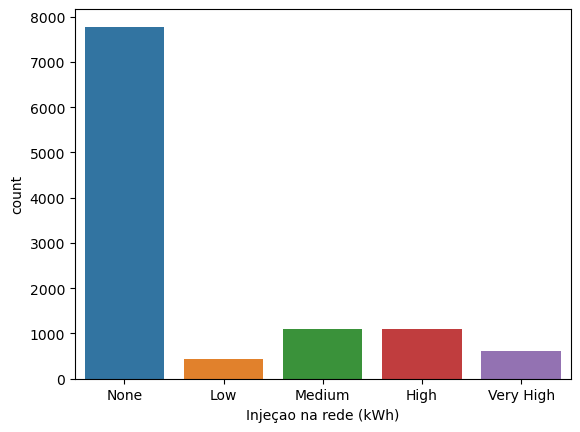

In [89]:
sns.countplot(x='Injeçao na rede (kWh)', data=treino)
plt.show()

### 'Hora' vs 'Normal (kWh)'

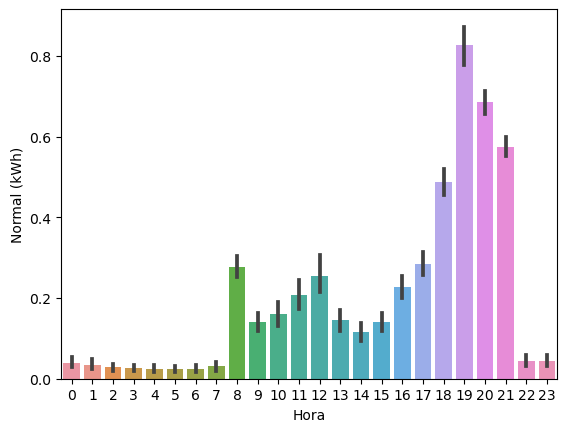

In [90]:
sns.barplot(x='Hora', y='Normal (kWh)', data=treino)
plt.show()

### 'Hora' vs 'Horario Economico (kWh)'

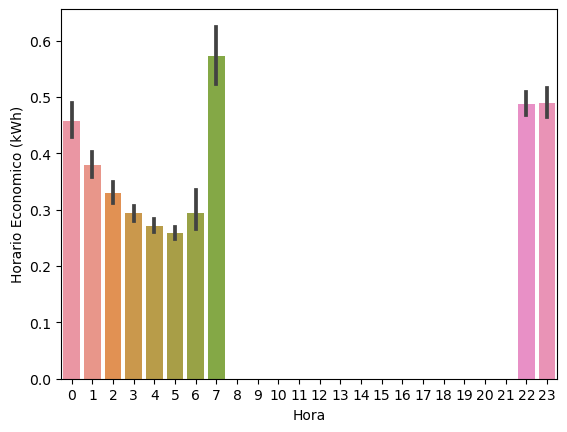

In [91]:
sns.barplot(x='Hora', y='Horario Economico (kWh)', data=treino)
plt.show()

### Relation: 'Month' with 'Injeçao na rede (kWh)'

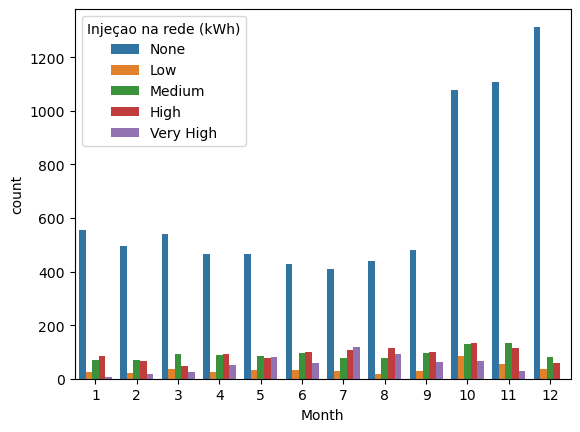

In [92]:
sns.countplot(x='Month', hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'Season' with 'Injeçao na rede (kWh)'

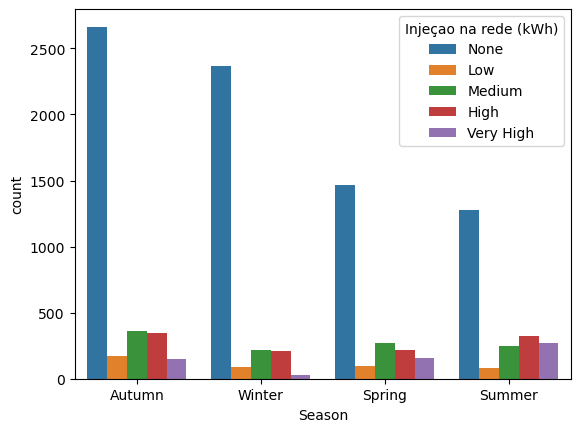

In [93]:
sns.countplot(x='Season', hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'Normal (kWh)' with 'Injeçao na rede (kWh)'

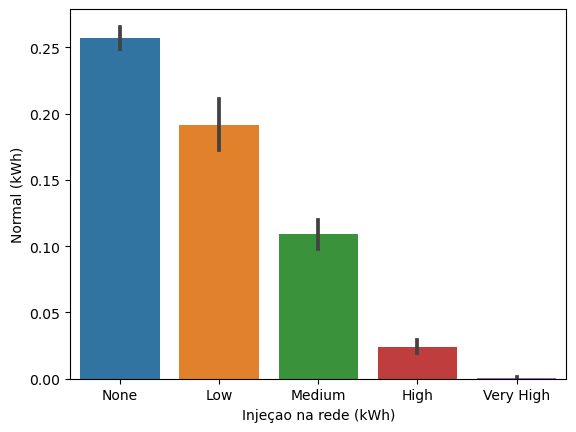

In [94]:
sns.barplot(x='Injeçao na rede (kWh)', y='Normal (kWh)', data=treino)
plt.show()

### Relation: 'Horario Economico (kWh)' with 'Injeçao na rede (kWh)'

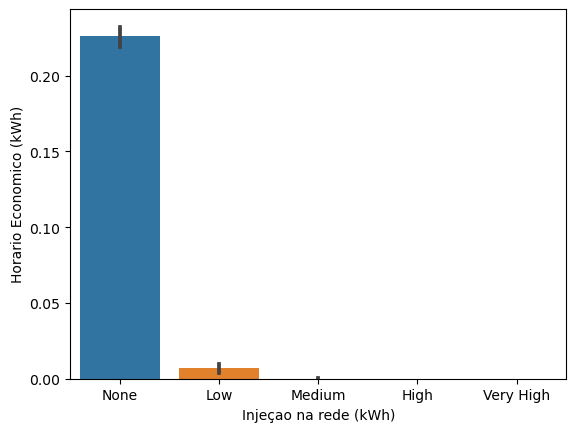

In [95]:
sns.barplot(x='Injeçao na rede (kWh)', y='Horario Economico (kWh)', data=treino)
plt.show()

### Relation: 'Autoconsumo (kWh)' with 'Injeçao na rede (kWh)'

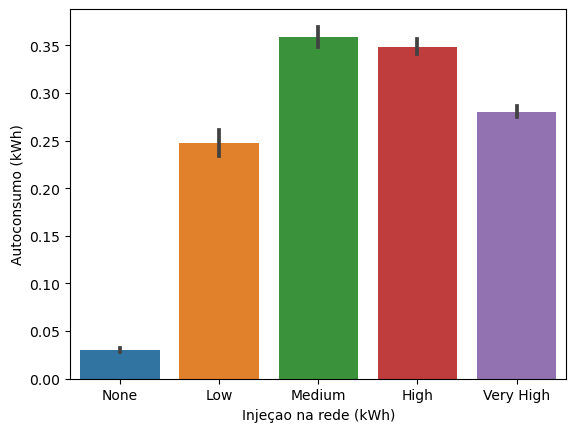

In [96]:
sns.barplot(x='Injeçao na rede (kWh)', y='Autoconsumo (kWh)', data=treino)
plt.show()

### Relation: 'temp' with 'Injeçao na rede (kWh)'

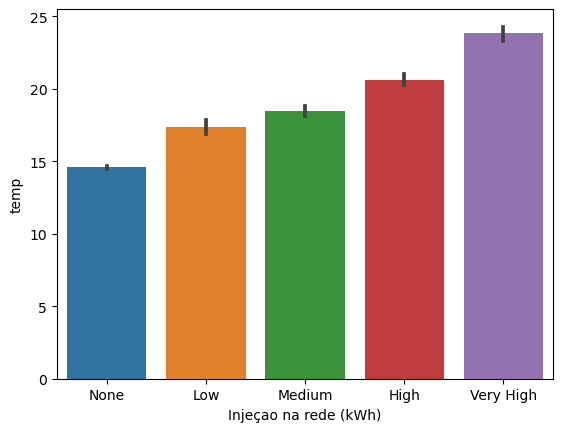

In [97]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp', data=treino)
plt.show()

### Relation: 'feels_like' with 'Injeçao na rede (kWh)'

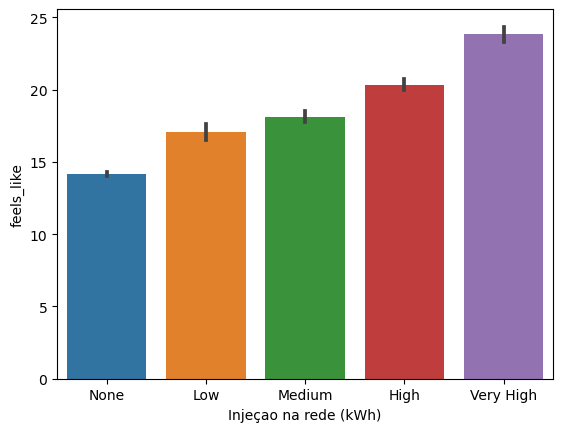

In [98]:
sns.barplot(x='Injeçao na rede (kWh)', y='feels_like', data=treino)
plt.show()

### Relation: 'temp_min' with 'Injeçao na rede (kWh)'

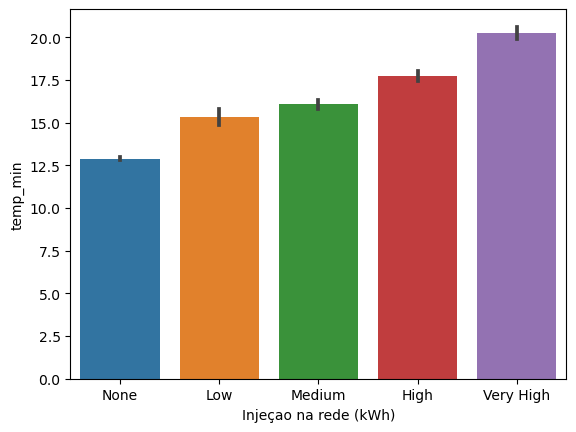

In [99]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp_min', data=treino)
plt.show()

### Relation: 'temp_max' with 'Injeçao na rede (kWh)'

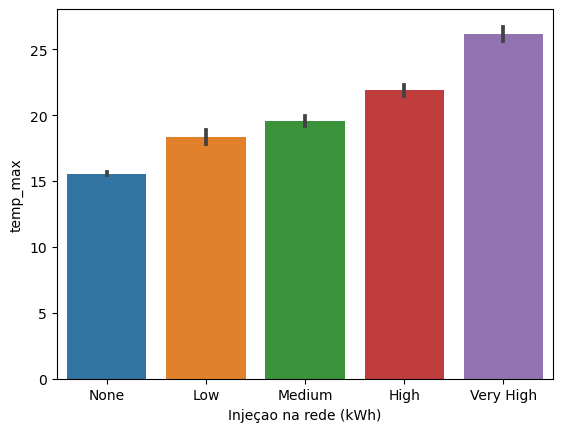

In [100]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp_max', data=treino)
plt.show()

### Relation: 'pressure' with 'Injeçao na rede (kWh)'

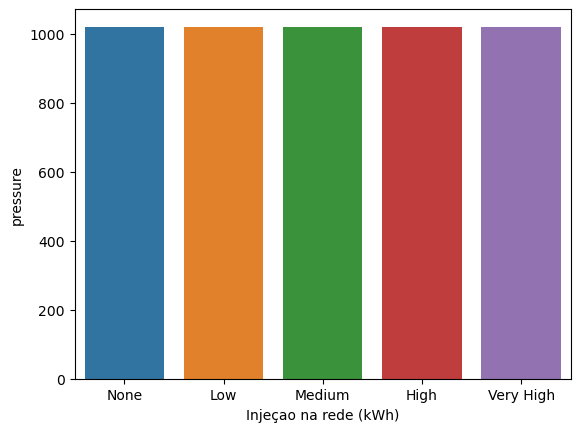

In [101]:
sns.barplot(x='Injeçao na rede (kWh)', y='pressure', data=treino)
plt.show()

### Relation: 'humidity' with 'Injeçao na rede (kWh)'

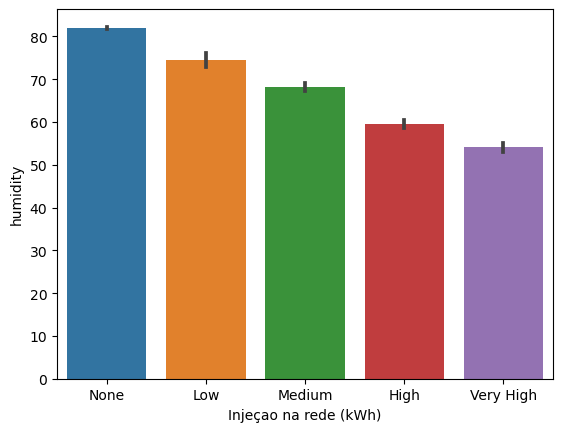

In [102]:
sns.barplot(x='Injeçao na rede (kWh)', y='humidity', data=treino)
plt.show()

### Relation: 'wind_speed' with 'Injeçao na rede (kWh)'

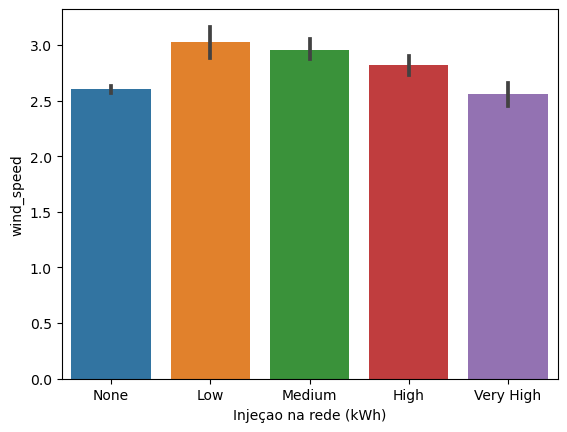

In [103]:
sns.barplot(x='Injeçao na rede (kWh)', y='wind_speed', data=treino)
plt.show()

We can check that the feature 'rain_1h', when the feature 'Injeçao na rede (kWh)' takes the value 'Very High', is very scattered.

### Relation: 'clouds_all' with 'Injeçao na rede (kWh)'

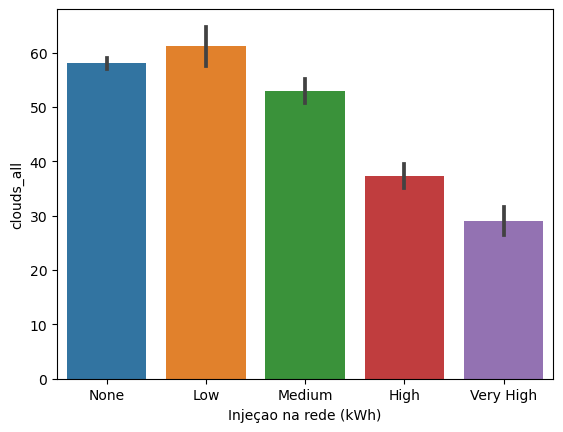

In [104]:
sns.barplot(x='Injeçao na rede (kWh)', y='clouds_all', data=treino)
plt.show()

### Relation: 'weather_description' with 'Injeçao na rede (kWh)'

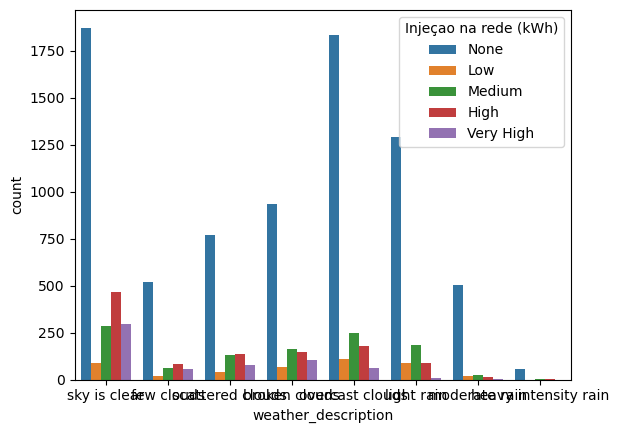

In [105]:
w_d_order = ['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds', 'overcast clouds', 'light rain', 'moderate rain', 'heavy intensity rain']

sns.countplot(x='weather_description', order= w_d_order, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

## Phase 4: Data treatment pre-modeling

### Categorical features encoding

In [106]:
# 'Injeçao na rede (kWh)' manual encoding
order_mapping_inr = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
treino['Injeçao na rede (kWh)'] = treino['Injeçao na rede (kWh)'].map(order_mapping_inr)

# 'Season' manual encoding
order_mapping_season = {"Winter": 1, "Spring": 2, "Summer": 3, "Autumn": 4}
treino['Season'] = treino['Season'].map(order_mapping_season)
teste['Season'] = teste['Season'].map(order_mapping_season)

# 'Data' label encoding
label_encoder_d = preprocessing.LabelEncoder()  
treino['Data'] = label_encoder_d.fit_transform(treino['Data'])
teste['Data'] = label_encoder_d.fit_transform(teste['Data'])

# 'weather_description' one-hot encoding
treino = pd.get_dummies(treino, columns=['weather_description'], dtype=int)
# treino['heavy intensity rain'] = 0
teste = pd.get_dummies(teste, columns=['weather_description'], dtype=int)
# Renaming one-hot encoding columns
renaming = {'weather_description_broken clouds': 'broken clouds', 'weather_description_few clouds': 'few clouds', 
            'weather_description_light rain': 'light rain', 'weather_description_moderate rain': 'moderate rain', 
            'weather_description_overcast clouds': 'overcast clouds', 'weather_description_scattered clouds': 'scattered clouds',
            'weather_description_sky is clear': 'sky is clear', 'weather_description_heavy intensity rain': 'heavy intensity rain'}
treino.rename(columns=renaming, inplace=True)
teste.rename(columns=renaming, inplace=True)
treino

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),snowfall (cm),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),...,shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),Season,Month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,13.97,13.54,11.45,14.04,1027,1027.9,1004.4,81,1.96,0.00,87,0,0,0.000,0.000,0.0,0,0.0,14.4,14.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,0,0,0,0,0,1,0,0
1,13.48,13.02,13.43,13.90,1028,1027.9,1004.4,82,1.83,0.00,91,0,1,0.000,0.000,0.0,0,0.0,18.0,13.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,0,0,0,0,0,1,0,0
2,12.93,12.47,12.72,13.43,1027,1027.8,1004.3,84,1.96,0.00,93,0,2,0.000,0.000,0.0,0,0.0,14.4,13.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,0,0,0,0,0,1,0,0
3,12.61,12.15,10.34,12.93,1027,1027.6,1004.1,85,1.85,0.00,95,0,3,0.000,0.000,0.0,0,0.0,14.8,13.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,0,0,0,0,0,1,0,0
4,12.61,12.17,9.79,12.93,1027,1027.8,1004.3,86,1.83,0.00,93,0,4,0.000,0.000,0.0,0,0.0,14.8,13.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,15.70,15.57,15.57,15.72,1018,1018.4,995.3,86,5.56,3.58,100,458,19,1.693,0.000,0.0,0,0.0,52.2,12.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12,0,0,0,0,1,0,0,0
11012,15.55,15.43,12.72,15.70,1018,1018.8,995.7,87,4.47,4.20,100,458,20,1.327,0.000,0.0,0,0.0,47.5,12.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12,0,0,1,0,0,0,0,0
11013,13.45,13.28,12.23,13.99,1019,1019.0,995.9,93,3.29,4.23,100,458,21,0.757,0.000,0.0,0,0.0,46.4,12.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12,0,0,1,0,0,0,0,0
11014,12.93,12.73,12.23,13.43,1019,1019.0,995.9,94,1.49,3.90,100,458,22,0.000,0.675,0.0,0,0.0,40.0,12.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12,0,0,0,0,1,0,0,0


### Correlation Matrix

c:\Users\Gonçalo\miniconda3\envs\DAA\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


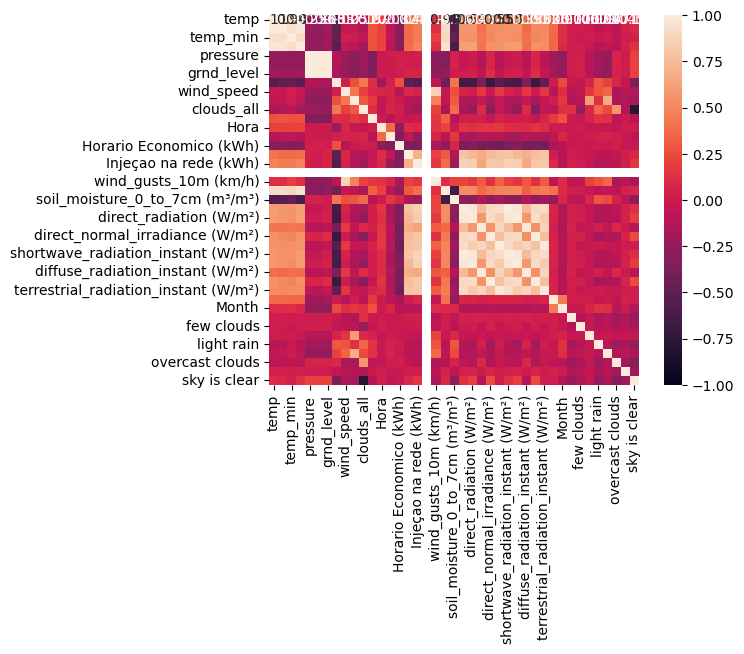

In [107]:
corr_matrix = treino.corr(numeric_only=True)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

In [108]:
treino[treino.columns[1:]].corr()['Injeçao na rede (kWh)'][:]

feels_like                                 0.451258
temp_min                                   0.444381
temp_max                                   0.485924
pressure                                   0.033233
sea_level                                  0.026055
grnd_level                                 0.067209
humidity                                  -0.564490
wind_speed                                 0.046878
rain_1h                                   -0.123628
clouds_all                                -0.200856
Data                                      -0.004499
Hora                                       0.081695
Normal (kWh)                              -0.260828
Horario Economico (kWh)                   -0.347107
Autoconsumo (kWh)                          0.699685
Injeçao na rede (kWh)                      1.000000
snowfall (cm)                                   NaN
wind_gusts_10m (km/h)                      0.157285
soil_temperature_0_to_7cm (°C)             0.386188
soil_moistur

We already noticed that the feature 'pressure' has little to no impact in the target feature 'Injeçao na rede (kWh)'. We can now remove that feature.

In [109]:
treino.drop('pressure', inplace=True, axis=1)
teste.drop('pressure', inplace=True, axis=1)

Dropping features with super low correlation with the target feature

In [110]:
columns_to_drop = ['Data', 'Hora', 'wind_speed', 'Month', 'Season', 'snowfall (cm)', 'sea_level', 'grnd_level']

treino.drop(columns=columns_to_drop, inplace=True, axis=1)
teste.drop(columns=columns_to_drop, inplace=True, axis=1)

Our dataset is super inbalanced, there are much more None values in the target feature that all others. We are going to perform SMOTE (Syntetic Minority Over Sampling Technique), a oversampling technique, and RandomUnderSampler to address this imbalance.

In [111]:
treino['Injeçao na rede (kWh)'].value_counts()

Injeçao na rede (kWh)
0    7777
3    1103
2    1098
4     606
1     432
Name: count, dtype: int64

In [112]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Sampling Pipeline
over_stategy={0:7777, 1:750, 2:1500, 3: 1500, 4:750}
under_strategy={0:6000, 1: 750, 2: 1500, 3: 1500, 4:750}
over = SMOTE(random_state=183, sampling_strategy=over_stategy)
under = RandomUnderSampler(random_state=183, sampling_strategy=under_strategy)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

X_treino = treino.drop('Injeçao na rede (kWh)', axis=1)
y_treino = treino['Injeçao na rede (kWh)']

X_treino_res, y_treino_res = pipeline.fit_resample(X_treino, y_treino) 

In [113]:
y_treino_res.value_counts()

Injeçao na rede (kWh)
0    6000
2    1500
3    1500
1     750
4     750
Name: count, dtype: int64

In [114]:
order_reverse_mapping = {0: 'None', 1: 'Low',2: 'Medium',3: 'High',4: 'Very High'}
y_treino_res = y_treino_res.map(order_reverse_mapping)

Write the resulting datasets for later use.

In [115]:
X_treino_res['Injeçao na rede (kWh)'] = y_treino_res
X_treino_res.to_csv(f'datasets/treinoTratado.csv', index=False)
teste.to_csv(f'datasets/testeTratado.csv', index=False)